# **Bank Customer Churn Prediction And Analysis**

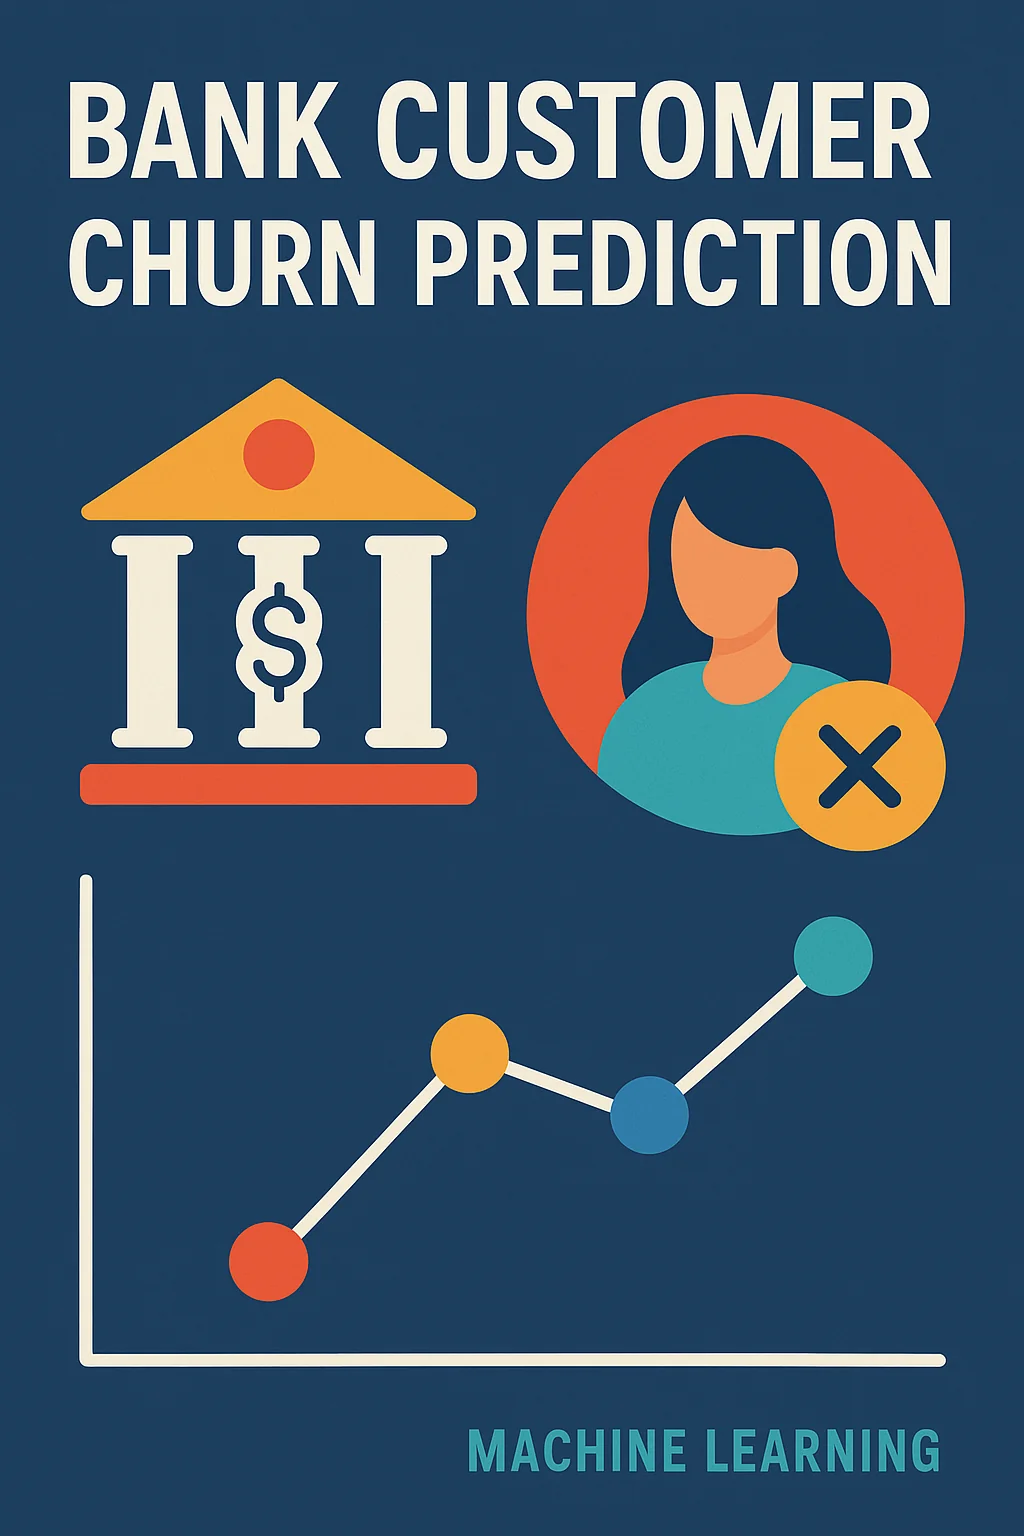

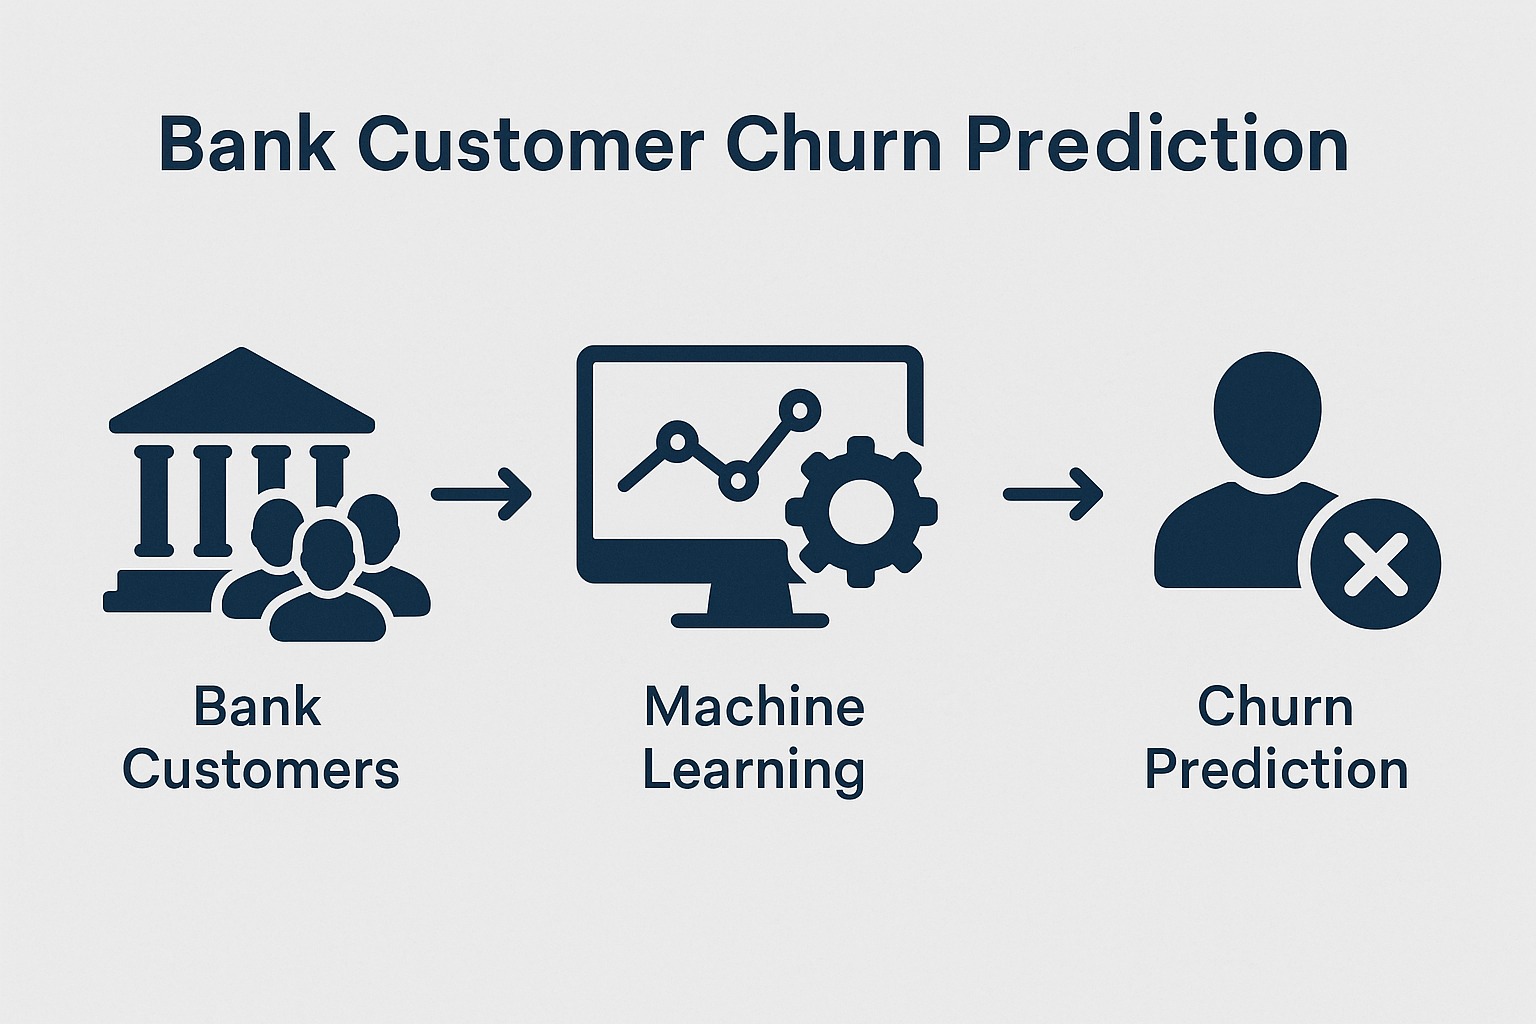

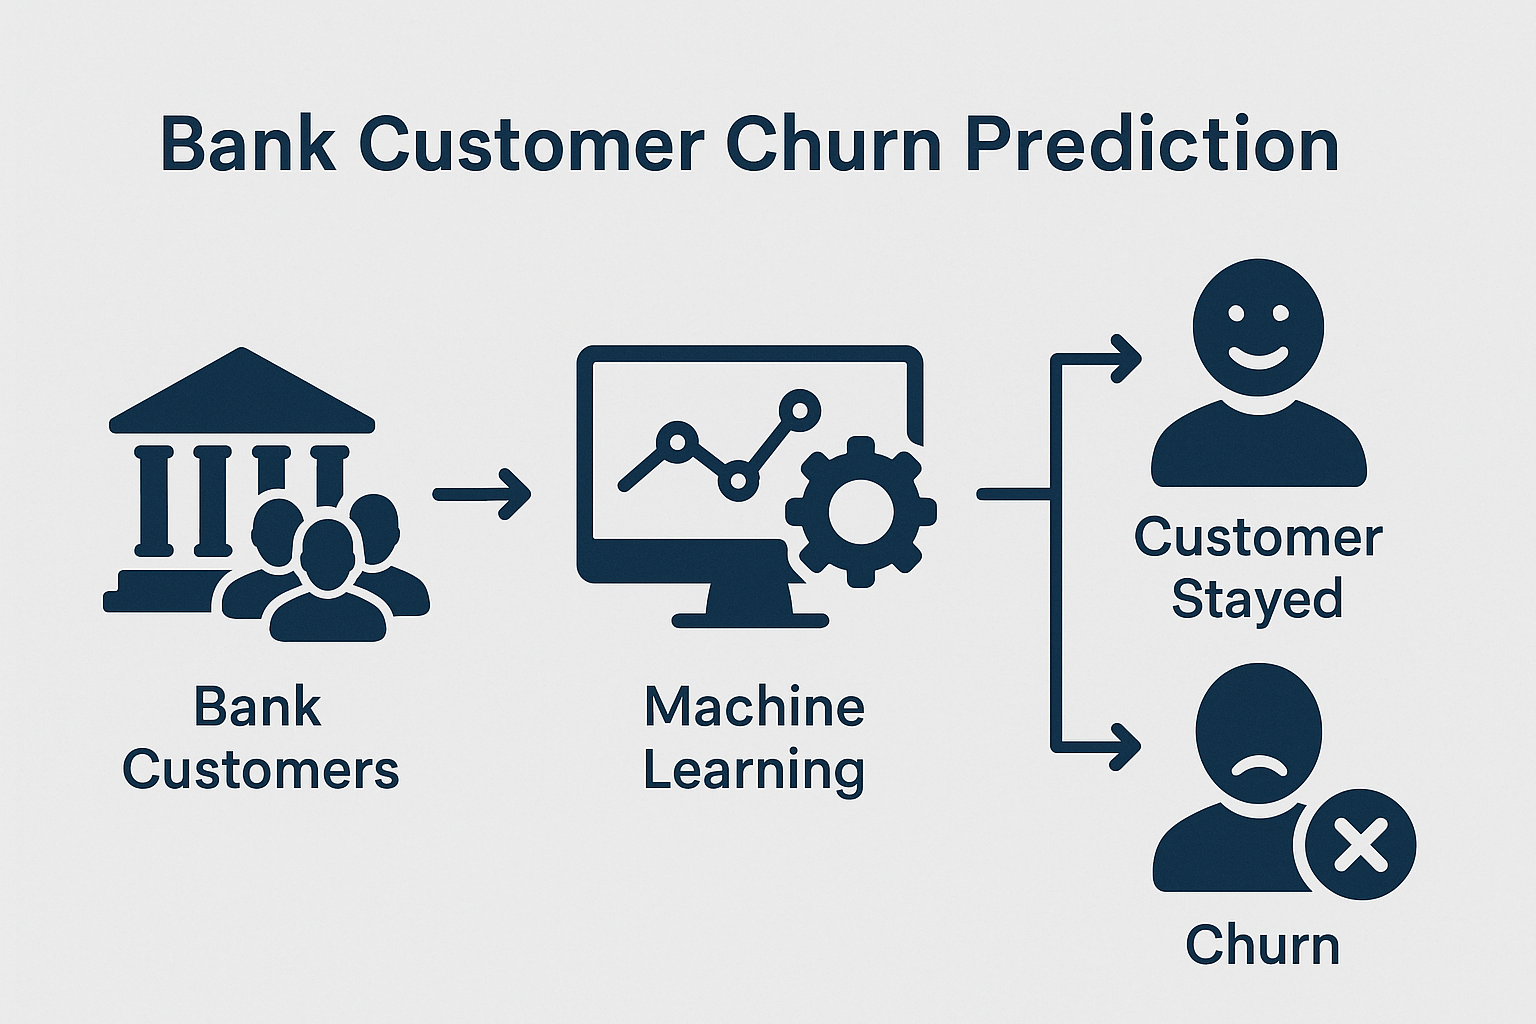

# Project Overview

 - The Bank Customer Churn Analysis and Prediction Project
 involves analysis and building a machine learning model to analysis and predict customer churn.
 -This project utilizes data science techniques such as data collection, exploration, feature engineering, machine learning, and model deployment, with the goal of identifying customers at risk of leaving and enabling the company to take proactive retention measures.

| Column Name        | Description                                                                 |
|--------------------|-----------------------------------------------------------------------------|
| RowNumber          | A unique identifier for each record.                                        |
| Customer ID        | A unique identifier for each customer.                                      |
| Surname            | The customer's surname or last name.                                        |
| Credit Score       | A numerical value representing the customer's credit score.                 |
| Geography          | The country where the customer resides (France, Spain, or Germany).         |
| Gender             | The customer's gender (Male or Female).                                     |
| Age                | The customer's age.                                                         |
| Tenure             | The number of years the customer has been with the bank.                    |
| Balance            | The customer's account balance.                                             |
| NumOfProducts      | The number of bank products the customer uses (e.g., savings account, credit card). |
| HasCrCard          | Whether the customer has a credit card (1 = yes, 0 = no).                   |
| IsActiveMember     | Whether the customer is an active member (1 = yes, 0 = no).                 |
| EstimatedSalary    | The estimated salary of the customer.                                       |
| Exited             | Whether the customer has churned (1 = yes, 0 = no).                         |


In [1]:
# public libiraies
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import sys
sys.path.append('mylibirary-0.0.1-py3-none-any.whl')
import MyMachineLearningLib as ml


In [4]:
# our own libiraies
import MyMachineLearningLib as ml
import MyDataUitlsLib as ul
import MyVisualizationLib as vl

## 1. 📥 Data Collection
- Load the dataset (CSV, SQL, API, etc.)
- Understand the source and quality of the data

In [5]:
FilePath= r'1-DataCollection\DataSet Before Cleanig.csv'
df=ul.load_data(FilePath)

column names: ['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
Updated column names(strip, lowercase, and standardize spaces): ['rownumber', 'customerid', 'surname', 'creditscore', 'geography', 'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard', 'isactivemember', 'estimatedsalary', 'exited']
Dataset loaded successfully with 10002 rows and 14 columns.


# 📄 Conclusion


| **Description**                       | **Details**                                                                 |
|--------------------------------------|------------------------------------------------------------------------------|
| **Original Column Names**            | `['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']` |
| **Updated Column Names**             | `['rownumber', 'customerid', 'surname', 'creditscore', 'geography', 'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard', 'isactivemember', 'estimatedsalary', 'exited']` |
| **Rows in Dataset**                  | 10002                                                                       |
| **Columns in Dataset**               | 14                                                                          |
| **Notes**                            | Column names were stripped, lowercased, and standardized for consistency.   |

# 2. 🗂️ Data Understanding
- View dataset structure (rows, columns)
- Check data types and sample values
- Identify target and feature variables
- Understand the business/domain context

In [6]:
FolderName="2-DataUnderstanding"

In [7]:
df

rownumber  customerid    surname  creditscore geography  gender   age  \
0              1    15634602   Hargrave          619    France  Female  42.0   
1              2    15647311       Hill          608     Spain  Female  41.0   
2              3    15619304       Onio          502    France  Female  42.0   
3              4    15701354       Boni          699    France  Female  39.0   
4              5    15737888   Mitchell          850     Spain  Female  43.0   
...          ...         ...        ...          ...       ...     ...   ...   
9997        9998    15584532        Liu          709    France  Female  36.0   
9998        9999    15682355  Sabbatini          772   Germany    Male  42.0   
9999        9999    15682355  Sabbatini          772   Germany    Male  42.0   
10000      10000    15628319     Walker          792    France  Female  28.0   
10001      10000    15628319     Walker          792    France  Female  28.0   

       tenure    balance  numofproducts  hascrcard  isactivemember  \
0           2       0.00              1        1.0             1.0   
1           1   83807.86              1        0.0             1.0   
2           8  159660.80              3        1.0             0.0   
3           1       0.00              2        0.0             0.0   
4           2  125510.82              1        NaN             1.0   
...       ...        ...            ...        ...             ...   
9997        7       0.00              1        0.0             1.0   
9998        3   75075.31              2        1.0             0.0   
9999        3   75075.31              2        1.0             0.0   
10000       4  130142.79              1        1.0             0.0   
10001       4  130142.79              1        1.0             0.0   

       estimatedsalary  exited  
0            101348.88       1  
1            112542.58       0  
2            113931.57       1  
3             93826.63       0  
4             79084.10       0  
...                ...     ...  
9997          42085.58       1  
9998          92888.52       1  
9999          92888.52       1  
10000         38190.78       0  
10001         38190.78       0  

[10002 rows x 14 columns]

In [8]:
BasicStatistics=ul.DataFrameStatistics(df).generate_report_lines()
ul.write_to_text_file(BasicStatistics,filename=f"{FolderName}\BasicStatistics.txt")

 Data written to 2-DataUnderstanding\BasicStatistics.txt


In [9]:
df[df.duplicated()]

rownumber  customerid    surname  creditscore geography  gender   age  \
9999        9999    15682355  Sabbatini          772   Germany    Male  42.0   
10001      10000    15628319     Walker          792    France  Female  28.0   

       tenure    balance  numofproducts  hascrcard  isactivemember  \
9999        3   75075.31              2        1.0             0.0   
10001       4  130142.79              1        1.0             0.0   

       estimatedsalary  exited  
9999          92888.52       1  
10001         38190.78       0

In [10]:
ul.check_data_for_preprocessing(df)

 Dataset Shape: (10002, 14)
 Duplicate Rows: 2 (0.02%)
 Handle Missing Values:
 - geography: 1 missing (0.01%)
 - age: 1 missing (0.01%)
 - hascrcard: 1 missing (0.01%)
 - isactivemember: 1 missing (0.01%)
 No constant columns.
 Encode Categorical Columns:
 - surname
 - geography
 - gender
 Mixed Type Columns:
 - geography
 High Cardinality Columns:
 - rownumber: 10000 unique values
 - customerid: 10000 unique values
 - surname: 2932 unique values
 - creditscore: 460 unique values
 - age: 73 unique values
 - balance: 6382 unique values
 - estimatedsalary: 9999 unique values
 Skewed Numeric Columns:
 - exited: Skewness = 1.47
 - age: Skewness = 1.01
 Suggested Next Steps:
 - Handle missing data.
 - Encode categorical features.
 - Consider binning/embedding for high cardinality.
 - Apply transformations to skewed features.
 - Resolve inconsistent data types.


In [11]:
SummaryCheck=ul.check_data_for_preprocessing(df,return_text_report=True)
ul.write_to_text_file(SummaryCheck,filename=f"{FolderName}\SummaryCheck1.txt")

 Dataset Shape: (10002, 14)
 Duplicate Rows: 2 (0.02%)
 Handle Missing Values:
 - geography: 1 missing (0.01%)
 - age: 1 missing (0.01%)
 - hascrcard: 1 missing (0.01%)
 - isactivemember: 1 missing (0.01%)
 No constant columns.
 Encode Categorical Columns:
 - surname
 - geography
 - gender
 Mixed Type Columns:
 - geography
 High Cardinality Columns:
 - rownumber: 10000 unique values
 - customerid: 10000 unique values
 - surname: 2932 unique values
 - creditscore: 460 unique values
 - age: 73 unique values
 - balance: 6382 unique values
 - estimatedsalary: 9999 unique values
 Skewed Numeric Columns:
 - exited: Skewness = 1.47
 - age: Skewness = 1.01
 Suggested Next Steps:
 - Handle missing data.
 - Encode categorical features.
 - Consider binning/embedding for high cardinality.
 - Apply transformations to skewed features.
 - Resolve inconsistent data types.
 Data written to 2-DataUnderstanding\SummaryCheck1.txt


In [12]:
SummaryCheck=ul.check_data_for_preprocessing(ul.drop_columns(df,['rownumber','customerid','Surname']),return_text_report=True)
ul.write_to_text_file(SummaryCheck,filename=f"{FolderName}\SummaryCheck2.txt")

Column 'rownumber' found and will be dropped.
Column 'customerid' found and will be dropped.
Column 'surname' found and will be dropped.
 Dataset Shape: (10002, 11)
 Duplicate Rows: 2 (0.02%)
 Handle Missing Values:
 - geography: 1 missing (0.01%)
 - age: 1 missing (0.01%)
 - hascrcard: 1 missing (0.01%)
 - isactivemember: 1 missing (0.01%)
 No constant columns.
 Encode Categorical Columns:
 - geography
 - gender
 Mixed Type Columns:
 - geography
 High Cardinality Columns:
 - creditscore: 460 unique values
 - age: 73 unique values
 - balance: 6382 unique values
 - estimatedsalary: 9999 unique values
 Skewed Numeric Columns:
 - exited: Skewness = 1.47
 - age: Skewness = 1.01
 Suggested Next Steps:
 - Handle missing data.
 - Encode categorical features.
 - Consider binning/embedding for high cardinality.
 - Apply transformations to skewed features.
 - Resolve inconsistent data types.
 Data written to 2-DataUnderstanding\SummaryCheck2.txt


In [13]:
outlier=ul.identify_outliers(df)
ul.write_to_text_file(outlier,filename=f"{FolderName}\outlier.txt")


 Data written to 2-DataUnderstanding\outlier.txt


In [14]:
vl.plot_boxplots(df,df.columns,figsize=(8,10),save_folder=rf"{FolderName}\boxplot_images")

Boxplots saved in '2-DataUnderstanding\boxplot_images'


In [15]:
vl.plot_histograms(df,df.columns,save_folder=f"{FolderName}/histogram_images")

Histograms saved in '2-DataUnderstanding/histogram_images'


In [16]:
df_without_updating=df

# 📄 Conclusions

| No. | Conclusion                                                                 | Category                      |
|-----|----------------------------------------------------------------------------|-------------------------------|
| 1   | Remove unnecessary columns (`rownumber`, `customerid`, `surname`)         | 🧹 Data Cleaning              |
| 2   | Eliminate duplicated rows                                                 | 🧹 Data Cleaning              |
| 3   | Handle missing values                                                     | 🧹 Data Cleaning              |
| 4   | Apply encoders: One-Hot (`gender`), Label (`geography`)                  | ⚙️ Data Preprocessing         |
| 5   | Handle high cardinality (`creditscore`, `balance`, `estimatedsalary`)    | ⚙️ Data Preprocessing          |
| 6   | Apply transformations to skewed features (`age`)                         | ⚙️ Data Preprocessing         |


***
***
***

# 3. ✅ Data Cleaning & ⚙️ Data Preprocessing
- Remove duplicates
- Handle missing/null values
- Fix data types (e.g., convert strings to numbers)
- Strip whitespaces and standardize column names
- Encode categorical variables (Label Encoding, One-Hot Encoding)
- Scale/normalize numerical features (if needed)
- Feature engineering (e.g., bins, ratios, transformations)
- Drop irrelevant or redundant features (e.g., IDs)
- Split data into training and testing sets

In [17]:
FolderName="3-DataCleaning&DataPreprocessing"

## 3.1- Remove unnecessary columns

In [18]:
ColumnsToRemove=['rownumber' , 'customerid' , 'surname' ]
df=ul.drop_columns(df,ColumnsToRemove)

Column 'rownumber' found and will be dropped.
Column 'customerid' found and will be dropped.
Column 'surname' found and will be dropped.


## 3.2- Eliminate duplicated rows

In [19]:
df=ul.drop_duplicates(df)

Number of rows before dropping duplicates: 10002
Number of rows after dropping duplicates: 10000
Number of duplicated rows: 2


## 3.3- Handle missing values

In [20]:
df=ul.handle_missing_values(df)

Number of missing values before handling: 4
Rows with missing values have been dropped.
Number of missing values after handling: 0


## 3-4 one hot/label encoding

In [21]:
df = ul.encode_column(df,'gender',encoding_type="label")
df= ul.encode_column(df,'geography',encoding_type="onehot")

## 3-5 Handle high cardinality

### Common Credit Score Ranges

| No. | Credit Quality | Score Range | Encoded Value |
|-----|----------------|-------------|----------------|
| 1   | Poor           | 300–579     | 0              |
| 2   | Fair           | 580–669     | 1              |
| 3   | Good           | 670–739     | 2              |
| 4   | Very Good      | 740–799     | 3              |
| 5   | Excellent      | 800–850     | 4              |

### Common Age Ranges

| No. | Age Group  | Age Range    | Encoded Value |
|-----|------------|--------------|----------------|
| 1   | Younger    | 18–35        | 0              |
| 2   | Middle     | 35–50        | 1              |
| 3   | Older      | 50 and above | 2              |

### Common Balance Ranges

| No. | Balance Group | Balance Range      | Encoded Value |
|-----|---------------|--------------------|----------------|
| 1   | Low Balance   | 0 < Balance < 40,000 | 0              |
| 2   | Middle Balance| 40,000 ≤ Balance < 120,000 | 1       |
| 3   | High Balance  | Balance ≥ 120,000   | 2              |

### Common Estimated Salary Ranges

| No. | Salary Group      | Salary Range          | Encoded Value |
|-----|-------------------|-----------------------|----------------|
| 1   | Low Salary        | 0 < Salary < 40,000 | 0              |
| 2   | Middle Salary     | 40,000 ≤ Salary < 70,000 | 1            |
| 3   | High Salary       | Salary ≥ 70,000        | 2              |


### Common Tenure Ranges

| No. | Tenure Group   | Tenure Range       | Encoded Value |
|-----|----------------|--------------------|----------------|
| 1   | New Client     | 0 ≤ Tenure ≤ 1     | 0              |
| 2   | Short Client   | 1 < Tenure ≤ 3     | 1              |
| 3   | Mid Client     | 3 < Tenure ≤ 6     | 2              |
| 4   | Long Client    | Tenure > 6         | 3              |

In [22]:
encoding_config = {
    "creditscore": {
        "new_column": "creditscorerange",
        "bins": [300, 580, 670, 740, 800, 851, float('inf')],
        "labels": [0, 1, 2, 3, 4]
    },
    "age": {
        "new_column": "agerange",
        "bins": [18, 35, 50, float('inf')],
        "labels": [0, 1, 2]
    },
    "balance": {
        "new_column": "balancerange",
        "bins": [0, 40000, 120000, float('inf')],
        "labels": [0, 1, 2]
    },
    "estimatedsalary": {
        "new_column": "estimatedsalaryrange",
        "bins": [0, 40000, 70000, float('inf')],
        "labels": [0, 1, 2]
    },
    "tenure": {
        "new_column": "tenurerange",
        "bins": [0, 2, 4, 7, float('inf')],
        "labels": [0, 1, 2, 3]
    }
}

In [23]:
# Remove age column from encoding_config
encoding_config.pop("age", None)

{'new_column': 'agerange', 'bins': [18, 35, 50, inf], 'labels': [0, 1, 2]}

In [24]:
for column, config in encoding_config.items():
    print(column)
    df=ul.encode_by_ranges(df,column,config['new_column'],config['bins'],config['labels'])

creditscore
balance
estimatedsalary
tenure


## 3-6 Apply transformations to skewed features

In [25]:
df['ageskewed'] = np.log1p(df['age'])
df.describe()

creditscore          age       tenure        balance  numofproducts  \
count  9996.000000  9996.000000  9996.000000    9996.000000    9996.000000   
mean    650.503301    38.921071     5.013305   76476.263216       1.530212   
std      96.624668    10.488421     2.892353   62397.118820       0.581684   
min     350.000000    18.000000     0.000000       0.000000       1.000000   
25%     584.000000    32.000000     3.000000       0.000000       1.000000   
50%     652.000000    37.000000     5.000000   97173.290000       1.000000   
75%     717.250000    44.000000     7.250000  127639.372500       2.000000   
max     850.000000    92.000000    10.000000  250898.090000       4.000000   

         hascrcard  isactivemember  estimatedsalary       exited  genderlabel  \
count  9996.000000     9996.000000      9996.000000  9996.000000  9996.000000   
mean      0.705482        0.514906    100106.701248     0.203782     0.545618   
std       0.455849        0.499803     57513.314398     0.402829     0.497940   
min       0.000000        0.000000        11.580000     0.000000     0.000000   
25%       0.000000        0.000000     51002.110000     0.000000     0.000000   
50%       1.000000        1.000000    100238.110000     0.000000     1.000000   
75%       1.000000        1.000000    149400.107500     0.000000     1.000000   
max       1.000000        1.000000    199992.480000     1.000000     1.000000   

       geographyfrance  geographygermany  geographyspain    ageskewed  
count      9996.000000        9996.00000     9996.000000  9996.000000  
mean          0.501301           0.25100        0.247699     3.654680  
std           0.500023           0.43361        0.431698     0.251657  
min           0.000000           0.00000        0.000000     2.944439  
25%           0.000000           0.00000        0.000000     3.496508  
50%           1.000000           0.00000        0.000000     3.637586  
75%           1.000000           1.00000        0.000000     3.806662  
max           1.000000           1.00000        1.000000     4.532599

## Saveing Data after data pre processing

In [26]:
FileName=f"{FolderName}\DataAfterDataPreProcessing.csv"
ul.save_to_csv(df,FileName)

Data has been saved to d:\My drive\Course\Data Science\Projects\Graduation Projects\DataAnalysis_DEPI_GraduationProject\Customer_Churn_Prediction\000 Notebook\3-DataCleaning&DataPreprocessing\DataAfterDataPreProcessing.csv


'd:\\My drive\\Course\\Data Science\\Projects\\Graduation Projects\\DataAnalysis_DEPI_GraduationProject\\Customer_Churn_Prediction\\000 Notebook\\3-DataCleaning&DataPreprocessing\\DataAfterDataPreProcessing.csv'

In [27]:
BasicStatistics=ul.DataFrameStatistics(df).generate_report_lines()
ul.write_to_text_file(BasicStatistics,filename=f"{FolderName}\BasicStatistics.txt")
ul.write_to_text_file(SummaryCheck,filename=f"{FolderName}\SummaryCheck1.txt")

 Data written to 3-DataCleaning&DataPreprocessing\BasicStatistics.txt
 Data written to 3-DataCleaning&DataPreprocessing\SummaryCheck1.txt


# 📄 Conclusion

### 🧹 Data Cleaning Summary

| Step                        | Action Performed                         | Details                                                                 | Result / Insight                                  |
|-----------------------------|------------------------------------------|-------------------------------------------------------------------------|---------------------------------------------------|
| **3.1 - Remove Columns**    | Dropped unnecessary columns              | `rownumber`, `customerid`, `surname`                                   | Removed non-informative ID columns                |
| **3.2 - Remove Duplicates** | Removed duplicated rows                  | Rows before: 10,002<br>Rows after: 10,000<br>Duplicates removed: 2     | Improved data quality and uniqueness              |
| **3.3 - Handle Missing**    | Treated missing values                  | Missing before: 4<br>Missing after: 0                                   | No missing values remain — data is now complete   |


***
***
***

# 4. 📊 Exploratory Data Analysis (EDA)
- **Univariate Analysis**: histograms, boxplots, value counts
- **Bivariate/Multivariate Analysis**: correlation heatmap, scatter plots
- Analyze class balance in the target variable
- Compute summary statistics (mean, std, min, max)

In [28]:
EDAFolderPath='4-ExploratoryDataAnalysis'

In [29]:
#  Numeric Columns --> histograms, heatmap
numeric_columns = ["numofproducts","hascrcard","isactivemember","exited","genderlabel","creditscorerange","balancerange","estimatedsalaryrange","tenurerange","ageskewed"]
# numeric_columns = ["creditscore","age","tenure","balance","numofproducts","estimatedsalary","exited"]

#  Boolean Columns --> bar charts
categorical_columns = ["geography","gender","hascrcard",'isactivemember']

## 4.1 Histogram

In [30]:
vl.plot_histograms(df,numeric_columns,save_folder=f"{EDAFolderPath}/histogram_images")

Histograms saved in '4-ExploratoryDataAnalysis/histogram_images'


## 4.2 Pairplots

In [31]:
vl.plot_pairplots(df,numeric_columns,save_folder=f"{EDAFolderPath}/pairplot_images",graph_Name="numerical_pairplot")

Pair plot has been saved to the '4-ExploratoryDataAnalysis/pairplot_images' folder.


## 4.3 Heatmap

In [32]:
vl.plot_heatmap(df,numeric_columns,save_folder=f"{EDAFolderPath}/heatmap_images",figsize=(10,10))

Correlation heatmap has been saved to the '4-ExploratoryDataAnalysis/heatmap_images' folder.


# 📄 Conclusion Based on the Above (EDA)

### 📊 Detailed Feature Set with Recommendations

| **Feature Name**         | **Type**       | **Recommendation** | **Reason for Inclusion/Exclusion**                                                                 |
|--------------------------|----------------|---------------------|-----------------------------------------------------------------------------------------------------|
| `age_skewed`             | Numerical       | ✅ Keep             | Older customers show significantly higher churn (corr ≈ 0.29); strong behavioral indicator.         |
| `isactivemember`         | Categorical     | ✅ Keep             | Active customers are less likely to churn (corr ≈ −0.16); crucial behavioral flag.                  |
| `geography_germany`      | Categorical     | ✅ Keep             | Customers from Germany churn more frequently (corr ≈ 0.17); useful regional feature.                |
| `geography_spain`        | Categorical     | ✅ Keep             | Contrasts with Germany; adds diversity and comparative signal.                                      |
| `geography_france`       | Categorical     | ❌ Drop             | Used as base category to avoid dummy variable trap in one-hot encoding.                             |
| `balancerange`           | Numerical       | ✅ Keep             | Financial indicator; shows bimodal pattern, possibly linked with churn behavior.                    |
| `creditscorerange`       | Numerical       | 🔹 Optional         | Weak or no correlation, but valuable in risk-based financial modeling. Useful for trees.            |
| `tenurerange`            | Numerical       | ✅ Keep             | Loyalty indicator; bimodal pattern could be informative for churn prediction.                       |
| `numofproducts`          | Numerical       | ✅ Keep             | Discrete but meaningful; customers with more products behave differently. Helps trees.              |
| `estimatedsalaryrange`   | Numerical       | 🔹 Optional         | Flat distribution; weak predictor, but might support tree models after feature importance check.    |
| `gender_label`           | Categorical     | 🔹 Optional         | Slight imbalance; very weak churn correlation (−0.10); could be tested but not critical.            |
| `hascrcard`              | Categorical     | 🔹 Optional         | Almost zero correlation with churn; keep for testing, drop if model doesn’t improve.                |
| `exited` (target)        | Categorical     | 🎯 Target           | Target variable (imbalanced); apply class balancing methods during training.                        |


# 🤖 Model Type Recommendations

| **Model Type**                            | **Reason**                                                                                     |
|------------------------------------------|------------------------------------------------------------------------------------------------|
| Tree-Based Models (Random Forest, XGBoost, LightGBM) | Handle skewed features well, no scaling required, robust to irrelevant features               |
| Logistic Regression                       | Good baseline, but requires scaling, binning, and dropping weak features                       |
| Gradient Boosting (e.g., CatBoost)        | Works well with categorical and numerical mix, handles imbalance                              |


## 1- Spliting data

In [33]:
# import function of train_test_splite to splite dataset
from sklearn.model_selection import train_test_split

# Features of data
X = df[["creditscore","numofproducts","balance","genderlabel","ageskewed","isactivemember","geographyfrance","geographygermany","geographyspain"]]

#X = df.drop(columns=["creditscore","geography", "gender", "age","tenure","hascrcard","estimatedsalary","exited","creditscorerange","balancerange","estimatedsalaryrange","tenurerange"])

y = df["exited"]

# Splite dataset to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=True, stratify=y, random_state=60)

# Display dataset after spliting
display(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(7996, 9)

(7996,)

(2000, 9)

(2000,)

## 2- Smote Oversample

(12734, 9)

(12734,)

(2000, 9)

(2000,)

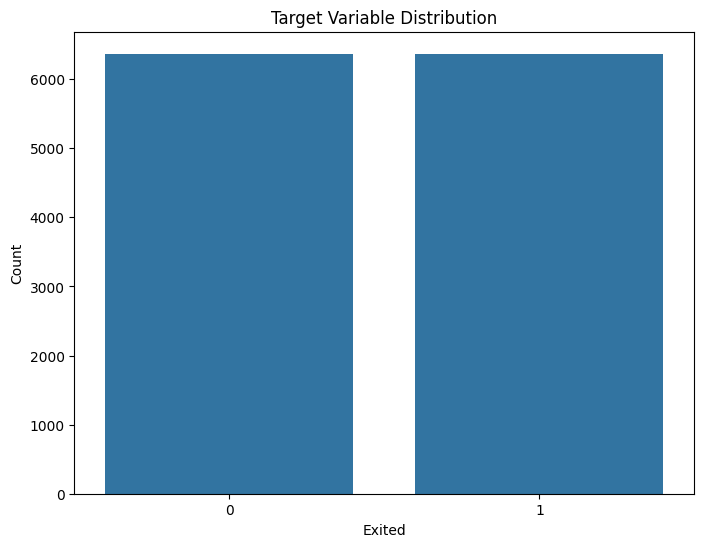

In [34]:
from imblearn.over_sampling import SMOTE

# Over-sampling Technique
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Shaping data after smote it
display(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# visualize target using bar
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train)
plt.title('Target Variable Distribution')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

## 3- Scaling Data

In [35]:
from sklearn.preprocessing import StandardScaler

#  Create Scaler
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)



## 4- Modeling Training

## 1- Model 1 Logistic Regression	

### Training Model 1 
#### Logistic Regression

In [36]:
# Training Model 1 Logistic Regression
# Importing Model
from sklearn.linear_model import LogisticRegression

# Create Model
Model1 = LogisticRegression(max_iter=1000)
Model1.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

### Evaluate Model 1
#### Logistic Regression

In [37]:
# Evaluate Model1 Logistic Regression
# Importing metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict Model Train
y_train_pred1 = Model1.predict(X_train_scaled)

# Evaluate Model Train
print("\n Confusion_matrix training \n\n",confusion_matrix(y_train, y_train_pred1))
print("\n Classification_report training \n\n",classification_report(y_train, y_train_pred1))

# Predict Model Test
y_test_pred1 = Model1.predict(X_test_scaled)

# Evaluate Model
print("\n\n -----------------------------------------------------------------")
print("\n Confusion_matrix testing \n\n",confusion_matrix(y_test, y_test_pred1))
print("\n Classification_report testing \n\n",classification_report(y_test, y_test_pred1))


 Confusion_matrix training 

 [[5406  961]
 [1438 4929]]

 Classification_report training 

               precision    recall  f1-score   support

           0       0.79      0.85      0.82      6367
           1       0.84      0.77      0.80      6367

    accuracy                           0.81     12734
   macro avg       0.81      0.81      0.81     12734
weighted avg       0.81      0.81      0.81     12734



 -----------------------------------------------------------------

 Confusion_matrix testing 

 [[1357  235]
 [ 199  209]]

 Classification_report testing 

               precision    recall  f1-score   support

           0       0.87      0.85      0.86      1592
           1       0.47      0.51      0.49       408

    accuracy                           0.78      2000
   macro avg       0.67      0.68      0.68      2000
weighted avg       0.79      0.78      0.79      2000



## 2- Model 2 Decision Tree

### Training Model 2
#### Decision Tree

In [38]:
# Training Model2 Decision Tree
# Importing Model
from sklearn.tree import DecisionTreeClassifier

# Create Model
Model2 = DecisionTreeClassifier(random_state= 60)

# Train Model
Model2.fit(X_train_scaled, y_train)


DecisionTreeClassifier(random_state=60)

### Evaluate Model 2
#### Decision Tree

In [39]:
# Evaluate Model2 Decision Tree
# Importing metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict Model Train
y_train_pred2 = Model2.predict(X_train_scaled)

# Evaluate Model Train
print("\n Confusion_matrix training \n\n",confusion_matrix(y_train, y_train_pred2))
print("\n Classification_report training \n\n",classification_report(y_train, y_train_pred2))

# Predict Model Test
y_test_pred2 = Model2.predict(X_test_scaled)

# Evaluate Model Test
print("\n\n -----------------------------------------------------------------")
print("\n Confusion_matrix testing \n\n",confusion_matrix(y_test, y_test_pred2))
print("\n Classification_report testing \n\n",classification_report(y_test, y_test_pred2))


 Confusion_matrix training 

 [[6367    0]
 [   2 6365]]

 Classification_report training 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6367
           1       1.00      1.00      1.00      6367

    accuracy                           1.00     12734
   macro avg       1.00      1.00      1.00     12734
weighted avg       1.00      1.00      1.00     12734



 -----------------------------------------------------------------

 Confusion_matrix testing 

 [[1319  273]
 [ 186  222]]

 Classification_report testing 

               precision    recall  f1-score   support

           0       0.88      0.83      0.85      1592
           1       0.45      0.54      0.49       408

    accuracy                           0.77      2000
   macro avg       0.66      0.69      0.67      2000
weighted avg       0.79      0.77      0.78      2000



## 3- Model 3 Random Forest

### Training Model 3
#### Random Forest

In [40]:
## Training Model

# Training Model3 Random Forest
from sklearn.ensemble import RandomForestClassifier

# Create Model
Model3 = RandomForestClassifier(random_state=60)

# Train Model
Model3.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=60)

### Evaluate Model 3
#### Random Forest

In [41]:
## Evaluate Model

# Evaluate Model3 Random Forest
# Importing metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict Model Train
y_train_pred3 = Model3.predict(X_train_scaled)

# Evaluate Model Train
print("\n Confusion_matrix training \n\n",confusion_matrix(y_train, y_train_pred3))
print("\n Classification_report training \n\n",classification_report(y_train, y_train_pred3))

# Predict Model Test
y_test_pred3 = Model3.predict(X_test_scaled)

# Evaluate Model Test
print("\n\n -----------------------------------------------------------------")
print("\n Confusion_matrix testing \n\n",confusion_matrix(y_test, y_test_pred3))
print("\n Classification_report testing \n\n",classification_report(y_test, y_test_pred3))


 Confusion_matrix training 

 [[6366    1]
 [   2 6365]]

 Classification_report training 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6367
           1       1.00      1.00      1.00      6367

    accuracy                           1.00     12734
   macro avg       1.00      1.00      1.00     12734
weighted avg       1.00      1.00      1.00     12734



 -----------------------------------------------------------------

 Confusion_matrix testing 

 [[1449  143]
 [ 175  233]]

 Classification_report testing 

               precision    recall  f1-score   support

           0       0.89      0.91      0.90      1592
           1       0.62      0.57      0.59       408

    accuracy                           0.84      2000
   macro avg       0.76      0.74      0.75      2000
weighted avg       0.84      0.84      0.84      2000



## 4- Model 4 K-Nearest Neighbors (KNN)

### Training Model 4
#### KNN

In [42]:
# Training Model4 KNN
from sklearn.neighbors import KNeighborsClassifier

# Create the model
Model4 = KNeighborsClassifier()  # Default: n_neighbors=5

# Train Model
Model4.fit(X_train_scaled, y_train)

KNeighborsClassifier()

### Evaluate Model 4
#### KNN

In [43]:
# Evaluate Model4 KNN
# Importing metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict Model Train
y_train_pred4 = Model4.predict(X_train_scaled)

# Evaluate Model Train
print("\n Confusion_matrix training \n\n",confusion_matrix(y_train, y_train_pred4))
print("\n Classification_report training \n\n",classification_report(y_train, y_train_pred4))

# Predict Model Test
y_test_pred4 = Model4.predict(X_test_scaled)

# Evaluate Model Test
print("\n\n -----------------------------------------------------------------")
print("\n Confusion_matrix testing \n\n",confusion_matrix(y_test, y_test_pred4))
print("\n Classification_report testing \n\n",classification_report(y_test, y_test_pred4))


 Confusion_matrix training 

 [[5816  551]
 [ 705 5662]]

 Classification_report training 

               precision    recall  f1-score   support

           0       0.89      0.91      0.90      6367
           1       0.91      0.89      0.90      6367

    accuracy                           0.90     12734
   macro avg       0.90      0.90      0.90     12734
weighted avg       0.90      0.90      0.90     12734



 -----------------------------------------------------------------

 Confusion_matrix testing 

 [[1417  175]
 [ 155  253]]

 Classification_report testing 

               precision    recall  f1-score   support

           0       0.90      0.89      0.90      1592
           1       0.59      0.62      0.61       408

    accuracy                           0.83      2000
   macro avg       0.75      0.76      0.75      2000
weighted avg       0.84      0.83      0.84      2000



## 5- Model 5 Support Vector Machine (SVC)

### Training Model 5
#### SVC

In [44]:
## Training Model5 SVC
from sklearn.svm import SVC
# Create Model
Model5 = SVC(random_state=60)

# Train Model
Model5.fit(X_train_scaled, y_train)

SVC(random_state=60)

### Evaluate Model 5
#### SVC


In [45]:
# Evaluate Model5 SVC
# Importing metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict Model Train
y_train_pred5 = Model5.predict(X_train_scaled)

# Evaluate Model Train
print("\n Confusion_matrix training \n\n",confusion_matrix(y_train, y_train_pred5))
print("\n Classification_report training \n\n",classification_report(y_train, y_train_pred5))

# Predict Model Test
y_test_pred5 = Model5.predict(X_test_scaled)

# Evaluate Model Test
print("\n\n -----------------------------------------------------------------")
print("\n Confusion_matrix testing \n\n",confusion_matrix(y_test, y_test_pred5))
print("\n Classification_report testing \n\n",classification_report(y_test, y_test_pred5))


 Confusion_matrix training 

 [[5781  586]
 [1025 5342]]

 Classification_report training 

               precision    recall  f1-score   support

           0       0.85      0.91      0.88      6367
           1       0.90      0.84      0.87      6367

    accuracy                           0.87     12734
   macro avg       0.88      0.87      0.87     12734
weighted avg       0.88      0.87      0.87     12734



 -----------------------------------------------------------------

 Confusion_matrix testing 

 [[1447  145]
 [ 169  239]]

 Classification_report testing 

               precision    recall  f1-score   support

           0       0.90      0.91      0.90      1592
           1       0.62      0.59      0.60       408

    accuracy                           0.84      2000
   macro avg       0.76      0.75      0.75      2000
weighted avg       0.84      0.84      0.84      2000



## 6- Model 6 XGBoost

In [46]:
# Installing XGBoost
!pip install xgboost

### Training Model 6
#### XGBoost

In [47]:
# Training Model6 XGBoost
from xgboost import XGBClassifier
# Create and train the model
Model6 = XGBClassifier(random_state=60)

# Train Model
Model6.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=60, ...)

### Evaluate Model 6
#### XGBoost

In [48]:
# Evaluate Model6 xgboost
# Importing metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict Model Train
y_train_pred6 = Model6.predict(X_train_scaled)

# Evaluate Model Train
print("\n Confusion_matrix training \n\n",confusion_matrix(y_train, y_train_pred6))
print("\n Classification_report training \n\n",classification_report(y_train, y_train_pred6))

# Predict Model Test
y_test_pred6 = Model6.predict(X_test_scaled)

# Evaluate Model Test
print("\n\n -----------------------------------------------------------------")
print("\n Confusion_matrix testing \n\n",confusion_matrix(y_test, y_test_pred6))
print("\n Classification_report testing \n\n",classification_report(y_test, y_test_pred6))


 Confusion_matrix training 

 [[6215  152]
 [ 485 5882]]

 Classification_report training 

               precision    recall  f1-score   support

           0       0.93      0.98      0.95      6367
           1       0.97      0.92      0.95      6367

    accuracy                           0.95     12734
   macro avg       0.95      0.95      0.95     12734
weighted avg       0.95      0.95      0.95     12734



 -----------------------------------------------------------------

 Confusion_matrix testing 

 [[1483  109]
 [ 184  224]]

 Classification_report testing 

               precision    recall  f1-score   support

           0       0.89      0.93      0.91      1592
           1       0.67      0.55      0.60       408

    accuracy                           0.85      2000
   macro avg       0.78      0.74      0.76      2000
weighted avg       0.85      0.85      0.85      2000



## 7-  AUC and ROC for Training Models with defaulte setting

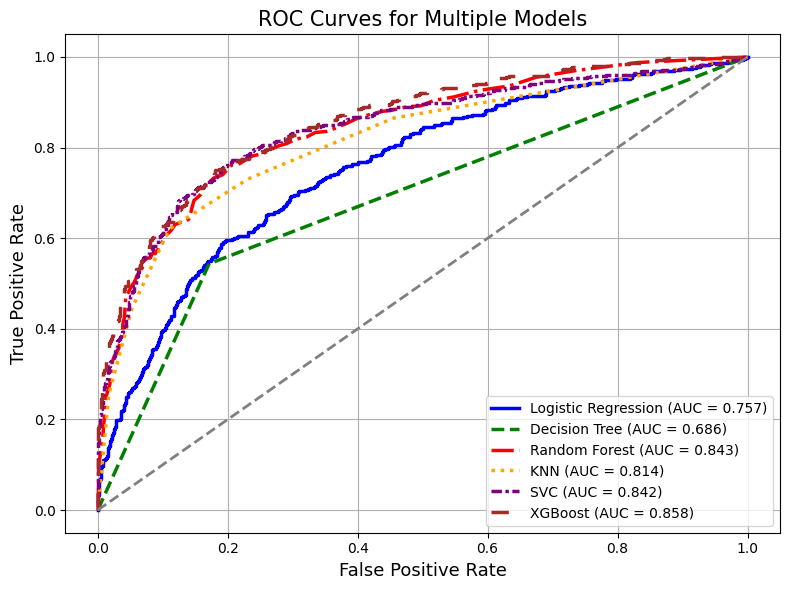

In [49]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Define the models
models = {
    'Logistic Regression': Model1,
    'Decision Tree': Model2,
    'Random Forest': Model3,
    'KNN': Model4,
    'SVC': Model5,
    'XGBoost': Model6
}

# Custom styles
line_styles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1)), (0, (5, 5))]
colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown']

# Start plotting
plt.figure(figsize=(8, 6))
for (name, model), style, color in zip(models.items(), line_styles, colors):
    try:
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test_scaled)[:, 1]
        else:
            y_proba = model.decision_function(X_test_scaled)

        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc = roc_auc_score(y_test, y_proba)

        plt.plot(fpr, tpr, linestyle=style, color=color, linewidth=2.5, label=f'{name} (AUC = {auc:.3f})')
    except Exception as e:
        print(f"{name} - Error: {e}")

# Random baseline
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)

plt.title('ROC Curves for Multiple Models', fontsize=15)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
plt.legend(loc='lower right', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()


# 📄 Conclusion After Training each Model
- From the accuracy account of each model in the training and test,and Recalland ROC Graph
We noticed that the best three models can be tuned are Random Forest, SVC, and XGboost Model .

# 5- 🔧 Hyperparameter Tuning
- Use Grid Search or Random Search
- Optimize key parameters (e.g., `max_depth`, `n_estimators`, `C`)
- Apply cross-validation for reliable tuning

## 1- Random Forest Tuning

In [50]:
# Tuning Model3 Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, recall_score, classification_report

# 1. Custom scorer combining accuracy and recall
def custom_score(y_true, y_pred):
    recall = recall_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    return (recall + accuracy) / 2

custom_scorer = make_scorer(custom_score)

# 2. Base model
rf = RandomForestClassifier(random_state=42)

# 3. Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': [None, 'balanced']
}

# 4. Grid Search
grid_search3 = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           scoring=custom_scorer, cv=5, n_jobs=-1)

# 5 Fiting Model
grid_search3.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search3.best_params_)

# Predict Model Train tuning
y_train_tuning_pred3 = grid_search3.predict(X_train_scaled)

# Evaluate Model Train tuning
print("\n Confusion_matrix training tuning \n\n",confusion_matrix(y_train, y_train_tuning_pred3))
print("\n Classification_report training tuning \n\n",classification_report(y_train, y_train_tuning_pred3))


# Predict Model Test tuning
y_test_tuning_pred3 = grid_search3.predict(X_test_scaled)

# Evaluate Model
print("\n\n -----------------------------------------------------------------")
print("\n Confusion_matrix testing tuning \n\n",confusion_matrix(y_test, y_test_tuning_pred3))
print("\n Classification_report testing tuning \n\n",classification_report(y_test, y_test_tuning_pred3))

Best parameters: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

 Confusion_matrix training tuning 

 [[6303   64]
 [ 173 6194]]

 Classification_report training tuning 

               precision    recall  f1-score   support

           0       0.97      0.99      0.98      6367
           1       0.99      0.97      0.98      6367

    accuracy                           0.98     12734
   macro avg       0.98      0.98      0.98     12734
weighted avg       0.98      0.98      0.98     12734



 -----------------------------------------------------------------

 Confusion_matrix testing tuning 

 [[1454  138]
 [ 172  236]]

 Classification_report testing tuning 

               precision    recall  f1-score   support

           0       0.89      0.91      0.90      1592
           1       0.63      0.58      0.60       408

    accuracy                           0.84      2000
   macro avg       0.76      0.75      

## 2- SVC Tuning

In [51]:
### Tuning Model5 SVC
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Type of kernel
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

# Initialize SVC
svc = SVC(random_state=42)

# GridSearchCV setup
grid_search5 = GridSearchCV(estimator=svc, param_grid=param_grid,
                           cv=5, scoring='recall', n_jobs=-1, verbose=2)

# 5 Fiting Model
grid_search5.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search5.best_params_)

# Predict Model Train tuning
y_train_tuning_pred5 = grid_search5.predict(X_train_scaled)

# Evaluate Model Train tuning
print("\n Confusion_matrix training tuning \n\n",confusion_matrix(y_train, y_train_tuning_pred5))
print("\n Classification_report training tuning \n\n",classification_report(y_train, y_train_tuning_pred5))


# Predict Model Test tuning
y_test_tuning_pred5 = grid_search5.predict(X_test_scaled)

# Evaluate Model
print("\n\n -----------------------------------------------------------------")
print("\n Confusion_matrix testing tuning \n\n",confusion_matrix(y_test, y_test_tuning_pred5))
print("\n Classification_report testing tuning \n\n",classification_report(y_test, y_test_tuning_pred5))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'poly'}

 Confusion_matrix training tuning 

 [[5772  595]
 [ 927 5440]]

 Classification_report training tuning 

               precision    recall  f1-score   support

           0       0.86      0.91      0.88      6367
           1       0.90      0.85      0.88      6367

    accuracy                           0.88     12734
   macro avg       0.88      0.88      0.88     12734
weighted avg       0.88      0.88      0.88     12734



 -----------------------------------------------------------------

 Confusion_matrix testing tuning 

 [[1443  149]
 [ 157  251]]

 Classification_report testing tuning 

               precision    recall  f1-score   support

           0       0.90      0.91      0.90      1592
           1       0.63      0.62      0.62       408

    accuracy                           0.85      2000
   macro avg       0.76      0.76      0.76   

## 3- XGBoost Tuning

In [52]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    make_scorer, recall_score, accuracy_score,
    precision_score
)
import numpy as np
import matplotlib.pyplot as plt

# Custom metric combining recall and accuracy with higher weight for recall
def custom_score(y_true, y_pred):
    recall = recall_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    return recall * 0.6 + accuracy * 0.4

# XGBoost model
xgb = XGBClassifier(
    eval_metric='logloss',
    random_state=60
)

# Hyperparameter grid
param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [4, 5, 6],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1],
    'scale_pos_weight': [3, 4, 5]
}

# Grid search
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring=make_scorer(custom_score),
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Training
grid_search.fit(X_train_scaled, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Evaluation on training data
y_train_pred = grid_search.predict(X_train_scaled)
print("\nConfusion Matrix - Training:\n", confusion_matrix(y_train, y_train_pred))
print("\nClassification Report - Training:\n", classification_report(y_train, y_train_pred))

# Predict probabilities for class 1 (churn)
y_probs = grid_search.predict_proba(X_test_scaled)[:, 1]

# Test different thresholds and record precision & recall
thresholds = np.arange(0.1, 0.91, 0.05)
precisions = []
recalls = []

for threshold in thresholds:
    y_pred_thresh = (y_probs >= threshold).astype(int)
    precisions.append(precision_score(y_test, y_pred_thresh))
    recalls.append(recall_score(y_test, y_pred_thresh))

# Choose the optimal threshold (example: 0.4 as a trade-off)
optimal_threshold = 0.4
y_test_pred = (y_probs >= optimal_threshold).astype(int)

# Final performance reports
print("\nConfusion Matrix - Testing:\n", confusion_matrix(y_test, y_test_pred))
print("\nClassification Report - Testing:\n", classification_report(y_test, y_test_pred))
print("\nROC AUC Score - Testing:", roc_auc_score(y_test, y_probs))

# Get predicted probabilities for class 1
y_probs = grid_search.predict_proba(X_test_scaled)[:, 1]


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 200, 'scale_pos_weight': 4, 'subsample': 0.8}

Confusion Matrix - Training:
 [[5061 1306]
 [ 182 6185]]

Classification Report - Training:
               precision    recall  f1-score   support

           0       0.97      0.79      0.87      6367
           1       0.83      0.97      0.89      6367

    accuracy                           0.88     12734
   macro avg       0.90      0.88      0.88     12734
weighted avg       0.90      0.88      0.88     12734


Confusion Matrix - Testing:
 [[1098  494]
 [  64  344]]

Classification Report - Testing:
               precision    recall  f1-score   support

           0       0.94      0.69      0.80      1592
           1       0.41      0.84      0.55       408

    accuracy                           0.72      2000
   macro avg       0.68      0.77      0.67      

## 4- AUC and ROC Graph after tuning

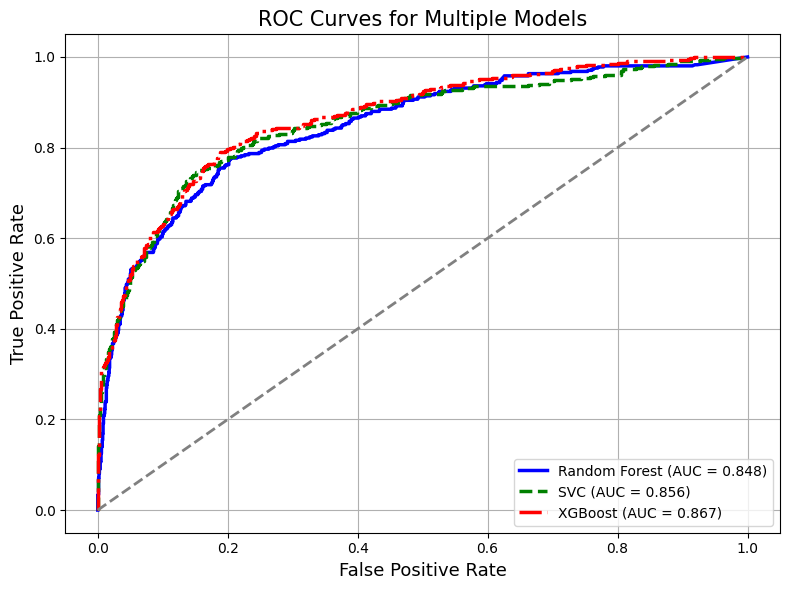

In [53]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Define the models
models = {
    'Random Forest': grid_search3,
    'SVC': grid_search5,
    'XGBoost': grid_search
}

# Custom styles
line_styles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1)), (0, (5, 5))]
colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown']

# Start plotting
plt.figure(figsize=(8, 6))
for (name, model), style, color in zip(models.items(), line_styles, colors):
    try:
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test_scaled)[:, 1]
        else:
            y_proba = model.decision_function(X_test_scaled)

        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc = roc_auc_score(y_test, y_proba)

        plt.plot(fpr, tpr, linestyle=style, color=color, linewidth=2.5, label=f'{name} (AUC = {auc:.3f})')
    except Exception as e:
        print(f"{name} - Error: {e}")

# Random baseline
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)

plt.title('ROC Curves for Multiple Models', fontsize=15)
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
plt.legend(loc='lower right', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()


# 📄 Conclusion after Tuning best 3 Models
- From the accuracy count of each model in the training and test ,and Recall and ROC Graph after Tuning 
We noticed that the best model For Our dataset is XGboost, And Best Paramters are
(
    colsample_bytree=0.8,
    gamma=0.1,
    learning_rate=0.05,
    max_depth=6,
    n_estimators=300,
    scale_pos_weight=5,
    subsample=0.8,
    #eval_metric='logloss',
    random_state=60
)

# 6- 🤖 Training Best Model

## Training Model XGBoost

In [54]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Create Best Model
model = xgb.XGBClassifier(
    colsample_bytree=0.8,
    gamma=0.1,
    learning_rate=0.05,
    max_depth=6,
    n_estimators=300,
    scale_pos_weight=5,
    subsample=0.8,
    #eval_metric='logloss',
    random_state=60
)

# Train Model
model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=60, ...)

# 7- 📈 Model Evaluation
- Evaluate on the train and test dataset 
- Metrics: Accuracy, Precision, Recall, F1-Score, AUC-ROC
- Visuals: Confusion matrix, ROC curve, classification report
- Analyze feature importance (if applicable)

In [55]:
# Evaluate Model6 xgboost
# Importing metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict Model Train
y_train_pred = model.predict(X_train_scaled)

# Evaluate Model Train
print("\n Confusion_matrix training \n\n",confusion_matrix(y_train, y_train_pred))
print("\n Classification_report training \n\n",classification_report(y_train, y_train_pred))

# Predict Model Test
y_test_pred = model.predict(X_test_scaled)

# Evaluate Model Test
print("\n\n -----------------------------------------------------------------")
print("\n Confusion_matrix testing \n\n",confusion_matrix(y_test, y_test_pred))
print("\n Classification_report testing \n\n",classification_report(y_test, y_test_pred))


 Confusion_matrix training 

 [[5152 1215]
 [ 102 6265]]

 Classification_report training 

               precision    recall  f1-score   support

           0       0.98      0.81      0.89      6367
           1       0.84      0.98      0.90      6367

    accuracy                           0.90     12734
   macro avg       0.91      0.90      0.90     12734
weighted avg       0.91      0.90      0.90     12734



 -----------------------------------------------------------------

 Confusion_matrix testing 

 [[1246  346]
 [  79  329]]

 Classification_report testing 

               precision    recall  f1-score   support

           0       0.94      0.78      0.85      1592
           1       0.49      0.81      0.61       408

    accuracy                           0.79      2000
   macro avg       0.71      0.79      0.73      2000
weighted avg       0.85      0.79      0.80      2000



## Drawing Coparison for model in training and test

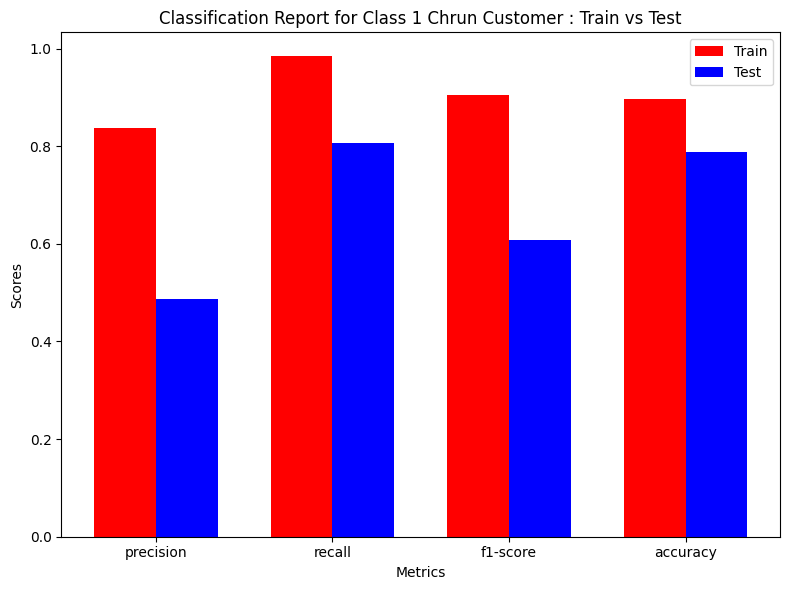

In [56]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Generate classification report for train and test sets
train_class_report = classification_report(y_train, model.predict(X_train_scaled), output_dict=True)
test_class_report = classification_report(y_test, model.predict(X_test_scaled), output_dict=True)  # Use scaled test data

# Extract the metrics for class "1" only
train_class_1 = train_class_report['1']  # Metrics for class "1" in the training set
test_class_1 = test_class_report['1']    # Metrics for class "1" in the test set

# Extract accuracy for both training and test sets
train_accuracy = accuracy_score(y_train, model.predict(X_train_scaled))
test_accuracy = accuracy_score(y_test, model.predict(X_test_scaled))

# Prepare data for plotting
categories = ['precision', 'recall', 'f1-score', 'accuracy']
train_values = [train_class_1['precision'], train_class_1['recall'], train_class_1['f1-score'], train_accuracy]
test_values = [test_class_1['precision'], test_class_1['recall'], test_class_1['f1-score'], test_accuracy]

# Set up the bar chart
x = np.arange(len(categories))  # The x positions for the bars
width = 0.35  # The width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot bars for training set (red color)
ax.bar(x - width / 2, train_values, width, label='Train', color='red')

# Plot bars for test set (blue color)
ax.bar(x + width / 2, test_values, width, label='Test', color='blue')

# Add labels, title, and x-axis tick labels
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Classification Report for Class 1 Chrun Customer : Train vs Test')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


## ROC For Model in train and test

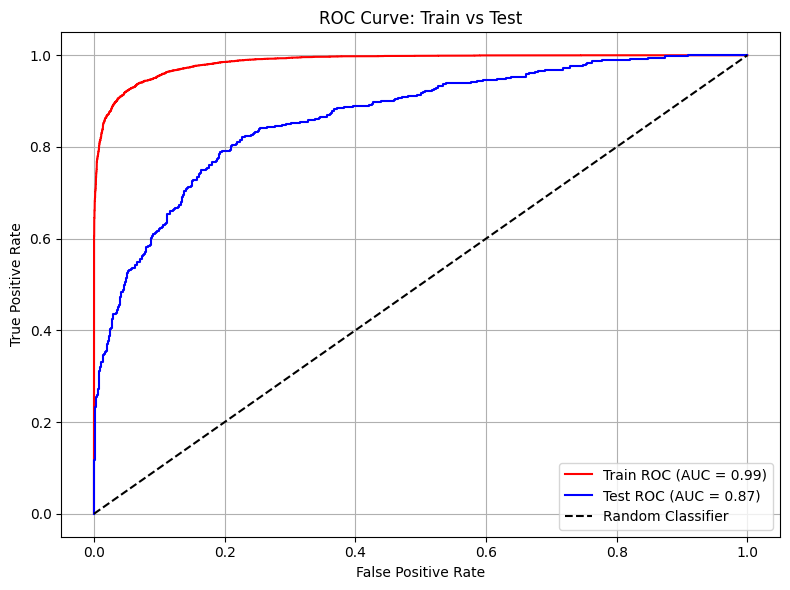

In [57]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for class 1
y_train_proba = model.predict_proba(X_train_scaled)[:, 1]
y_test_proba = model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)

# Calculate AUC scores
auc_train = roc_auc_score(y_train, y_train_proba)
auc_test = roc_auc_score(y_test, y_test_proba)

# Plot ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='red', label=f'Train ROC (AUC = {auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='blue', label=f'Test ROC (AUC = {auc_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Train vs Test')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


# 📄 Conclusion
- After training the model, we noticed that the model’s accuracy in the test was 77 % and the recall was 82%, and AUC equal 86 % This percentage is very good for a project to predict customer chrun from the bank.

# 8- 💾 Model Saving & Deployment
- Save model using `joblib` or `pickle`
- Create API (e.g., Streamlit, Flask, FastAPI)
- Deploy model to cloud or local server

## 1- Saving Model Weights

In [ ]:
from joblib import dump, load

# Save the trained model to a file
dump(model, '8-ModelSaving&Deployment\best_model_xgboost.joblib')


['best_model_xgboost.joblib']

## 2- Create API Streamlit

In [60]:
from joblib import load

# Load the trained model
model = load('best_model_xgboost.joblib')

# Example prediction (make sure the feature order matches your training)
# prediction = model.predict([[650, 2, 5000.0, 1, 0, 1, 1, 0, 0]])
# print(prediction)


In [61]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [62]:
import streamlit as st
from joblib import load
import numpy as np

# Load model
model = load('best_model_xgboost.joblib')

# Page config
st.set_page_config(page_title="Customer Churn Prediction", layout="wide")

# Custom CSS for styling
st.markdown("""
    <style>
        body {
            background-color: #f5e9e0;
        }
        .sidebar .sidebar-content {
            background-color: #c2704f;
        }
        h1, h2, h3, h4, .stMarkdown {
            color: #3e1f0e;
        }
        .stSelectbox, .stRadio, .stNumberInput, .stSlider {
            background-color: #fef3ec;
        }
        .stButton>button {
            background-color: #bf5f39;
            color: white;
            border-radius: 8px;
            font-size: 16px;
        }
        .stButton>button:hover {
            background-color: #a9482a;
        }
    </style>
""", unsafe_allow_html=True)

# Sidebar
st.sidebar.title("app")
st.sidebar.markdown("Dashboard\n\nData\n\nHistory\n\nlogIn")
st.sidebar.markdown("### Predict")

# Page Title
st.markdown("<h2 style='text-align: center;'>🎯 Predict Customer Churn</h2>", unsafe_allow_html=True)
st.markdown("""
Welcome! You will be using a trained XGBoost model to predict customer churn. This model uses selected attributes to determine the likelihood of churn. Please fill in the details below to make a prediction.
""")

st.markdown("---")

# Input Fields
gender = st.selectbox("Gender", ["Male", "Female"])
credit_score = st.slider("Credit Score", 300, 850, 650)
num_products = st.number_input("Number of Products", min_value=1, max_value=5, value=2)
balance = st.number_input("Balance", min_value=0.0, value=5000.0, step=100.0)
age = st.slider("Age", 18, 100, 35)
is_active = st.selectbox("Active Member", ["Yes", "No"])
geography = st.selectbox("Geography", ["France", "Germany", "Spain"])

# Feature Transformation
gender_label = 1 if gender == "Male" else 0
age_skewed = 1 if age >= 60 else 0
is_active_member = 1 if is_active == "Yes" else 0
geo_fr = 1 if geography == "France" else 0
geo_de = 1 if geography == "Germany" else 0
geo_es = 1 if geography == "Spain" else 0

# Predict Button
if st.button("Predict Churn"):
    features = [
        credit_score,
        num_products,
        balance,
        gender_label,
        age_skewed,
        is_active_member,
        geo_fr,
        geo_de,
        geo_es
    ]
    prediction = model.predict([features])[0]
    label = "🟥 Customer Left the Bank" if prediction == 1 else "🟩 Customer Is Still in the Bank"
    
    st.success("✅ Prediction Completed")
    st.markdown("---")
    st.markdown(f"<h4 style='text-align: center;'>{label}</h4>", unsafe_allow_html=True)


2025-04-24 18:03:59.447 
  command:

    streamlit run C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [63]:
X_train.head()

creditscore  numofproducts    balance  genderlabel  ageskewed  \
0          832              2       0.00            0   3.401197   
1          430              2  138992.48            1   3.610918   
2          850              1  122506.38            1   3.637586   
3          779              1   99786.20            0   3.737670   
4          627              1       0.00            0   3.583519   

   isactivemember  geographyfrance  geographygermany  geographyspain  
0             0.0                1                 0               0  
1             0.0                0                 1               0  
2             1.0                0                 1               0  
3             0.0                1                 0               0  
4             0.0                0                 0               1

# 📄 Conclusion

***
***
***

# 9- 🔁 Monitoring & Maintenance
- Monitor real-world predictions and performance
- Re-train with new data as needed
- Incorporate feedback loops for continuous improvement

# 📄 Conclusion